In [1]:
#!pip install lightgbm
#!pip install bubbly
#!pip install plotly_express

In [2]:
#Importation des librairies

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import lightgbm as lgb
sns.set(style="whitegrid")

Compréhension des données Nous effectuons un certains nombre d'opération pour comprendre les données

In [3]:
#Lecture de l'ensemble de données
df=pd.read_csv('insurance_claims.csv')

In [4]:
pd.set_option('display.max_columns', None)
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-09-06           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip insured_sex insured_education_level insured_occupation  \
0       466132        MALE                      MD       craft-repair   
1       468176        MALE                      MD  machine-op-inspct   
2       430632      FEMALE                     PhD              sales   
3       608117      FEMALE                     PhD       armed-forces   
4       610706        MALE               Associate              sales   

  insured_hobbies insured_relationship  capital-gains  capital-loss  \
0        sleeping              husband          53300             0   
1         reading       other-relative              0             0   
2     board-games            own-child          35100             0   
3     board-games            unmarried          48900        -62400   
4     board-games            unmarried          66000        -46000   

  incident_date             incident_type   collision_type incident_severity  \
0    2015-01-25  Single Vehicle Collision   Side Collision      Major Damage   
1    2015-01-21             Vehicle Theft                ?      Minor Damage   
2    2015-02-22   Multi-vehicle Collision   Rear Collision      Minor Damage   
3    2015-01-10  Single Vehicle Collision  Front Collision      Major Damage   
4    2015-02-17             Vehicle Theft                ?      Minor Damage   

  authorities_contacted incident_state incident_city  incident_location  \
0                Police             SC      Columbus     9935 4th Drive   
1                Police             VA     Riverwood       6608 MLK Hwy   
2                Police             NY      Columbus  7121 Francis Lane   
3                Police             OH     Arlington   6956 Maple Drive   
4                  None             NY     Arlington       3041 3rd Ave   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1               ?   
2                         7                            3              NO   
3                         5                            1               ?   
4                        20                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                       ?                5070   
2                2          3                      NO               34650   
3                1          2                      NO               63400   
4                0          1                      NO                6500   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0          6510           13020          52080       Saab        92x   
1           780             780           3510   Mercedes       E400   
2          7700            3850          23100      Dodge        RAM   
3          6340            6340          50720  Chevrolet      Tahoe   
4          1300             6

In [5]:
df.shape

(1000, 40)

In [6]:
# les informations sur l'ensembe des données

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
months_as_customer             1000 non-null int64
age                            1000 non-null int64
policy_number                  1000 non-null int64
policy_bind_date               1000 non-null object
policy_state                   1000 non-null object
policy_csl                     1000 non-null object
policy_deductable              1000 non-null int64
policy_annual_premium          1000 non-null float64
umbrella_limit                 1000 non-null int64
insured_zip                    1000 non-null int64
insured_sex                    1000 non-null object
insured_education_level        1000 non-null object
insured_occupation             1000 non-null object
insured_hobbies                1000 non-null object
insured_relationship           1000 non-null object
capital-gains                  1000 non-null int64
capital-loss                   1000 non-null int64
incident_date    

# Descriptive Statistics

In [7]:
# analyse descriptive sur les variables quatitatives
df.describe()

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_year  _c39  
count     1000.000000    1000.000000  1000.000000   0.0  
mean      7399.570000   37928.950000  2005.103000   NaN  
std       4824.726179   18886.252893     6.015861   NaN  
min          0.000000      70.000000  1995.000000   NaN  
25%       4445.000000   30292.500000  2000.000000   NaN  
50%       6750.000000   42100.000000  2005.000000   NaN  
75%      10885.000000   50822.500000  2010.000000   NaN  
max      23670.000000   79560.000000  2015.000000   NaN

In [8]:
df._c39.unique()

array([nan])

La variable '_c39' n'est constituée que des NaNs. Elle n'apporte aucune information sur les données

In [9]:
# suppression de la variable '_c39'
df=df.drop(['_c39'], axis =1)

In [10]:
# regardons les corrélations correlation
#df.corr()

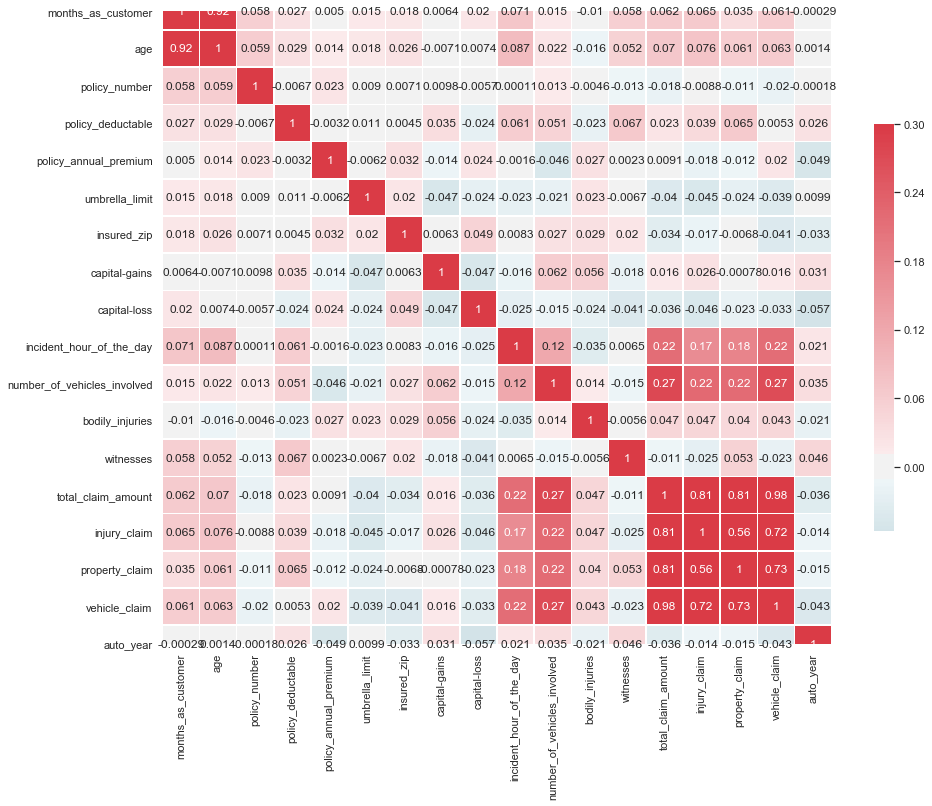

In [11]:
# matrice de corrélation
sns.set(style="white")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(df.corr(), cmap=cmap, vmax=.3, center=0,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

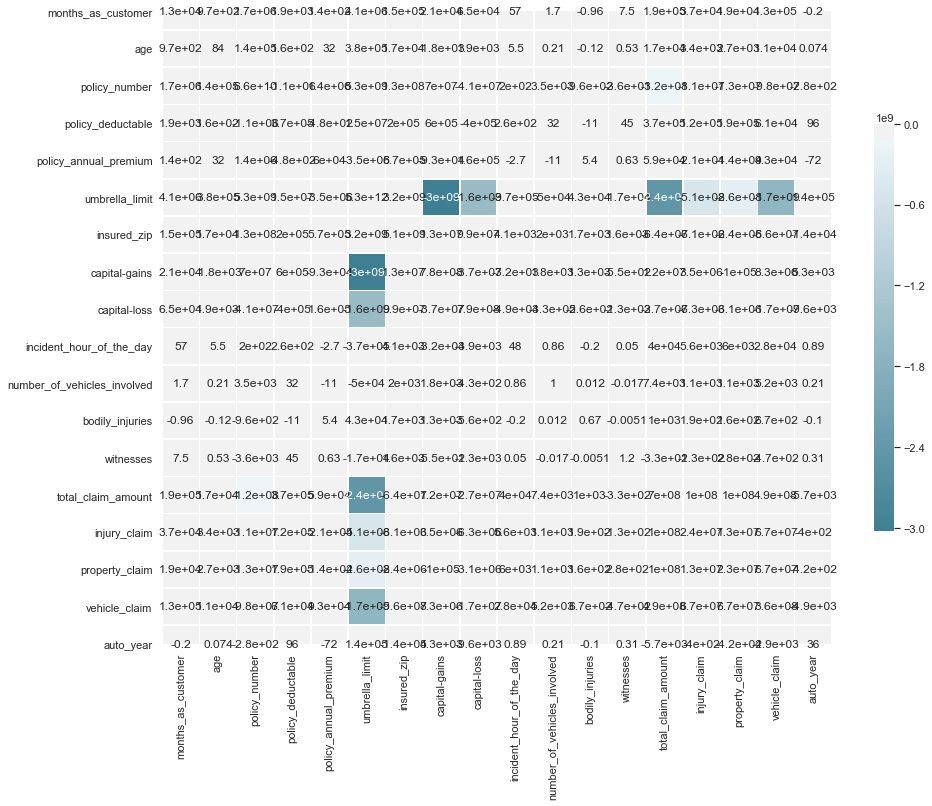

In [12]:
# matrice de covariance
sns.set(style="white")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(df.cov(), cmap=cmap, vmax=.3, center=0,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [13]:
# regardons la covariance
#df.cov()

# Traitement des données 

In [14]:

# remplacons  '?' dans la dataset par datset les NaN V
df = df.replace('?',np.NaN)

df.isnull().any()

months_as_customer             False
age                            False
policy_number                  False
policy_bind_date               False
policy_state                   False
policy_csl                     False
policy_deductable              False
policy_annual_premium          False
umbrella_limit                 False
insured_zip                    False
insured_sex                    False
insured_education_level        False
insured_occupation             False
insured_hobbies                False
insured_relationship           False
capital-gains                  False
capital-loss                   False
incident_date                  False
incident_type                  False
collision_type                  True
incident_severity              False
authorities_contacted          False
incident_state                 False
incident_city                  False
incident_location              False
incident_hour_of_the_day       False
number_of_vehicles_involved    False
p

On constate que les variables 'collision_type', 'property_damage', 'police_report_available' contiennent les valeurs manquantes traitons les 
de la manière suivante.

In [15]:
# missing value treatment using fillna

# we will replace the '?' by the most common collision type as we are unaware of the type.
df['collision_type'].fillna(df['collision_type'].mode()[0], inplace = True)

# It may be the case that there are no responses for property damage then we might take it as No property damage.
df['property_damage'].fillna('NO', inplace = True)

# again, if there are no responses fpr police report available then we might take it as No report available
df['police_report_available'].fillna('NO', inplace = True)

df.isnull().any().any()

False

# Data Visualizations

In [17]:
from bubbly.bubbly import bubbleplot
import plotly_express as px

Diagramme de dispersion entre la prime annuelle de la police et le montant total des sinistres

In [18]:
# plotting a scatter plot

fig = px.scatter(df, x = 'total_claim_amount', y = 'policy_annual_premium', color = 'insured_sex',
                marginal_x = 'rug', marginal_y = 'histogram')
fig.show()

In [21]:
fig = px.scatter_matrix(df, dimensions=["injury_claim", "property_claim", "vehicle_claim"], color = "insured_sex")
fig.show()

In [22]:
fig = px.parallel_categories(df, color="total_claim_amount", color_continuous_scale=px.colors.sequential.Inferno)
fig.show()

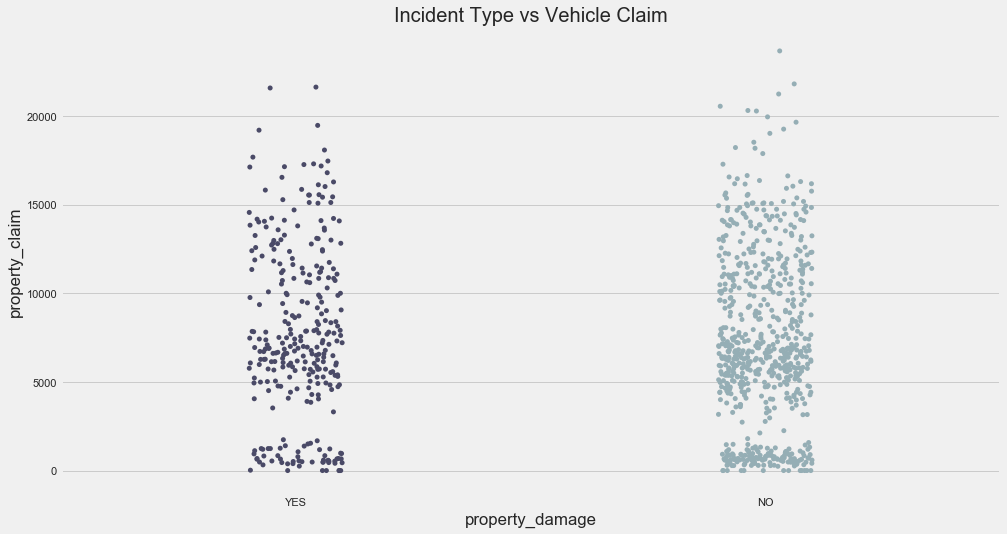

In [25]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)

sns.stripplot(df['property_damage'], df['property_claim'], palette = 'bone')
plt.title('Incident Type vs Vehicle Claim', fontsize = 20)
plt.show()

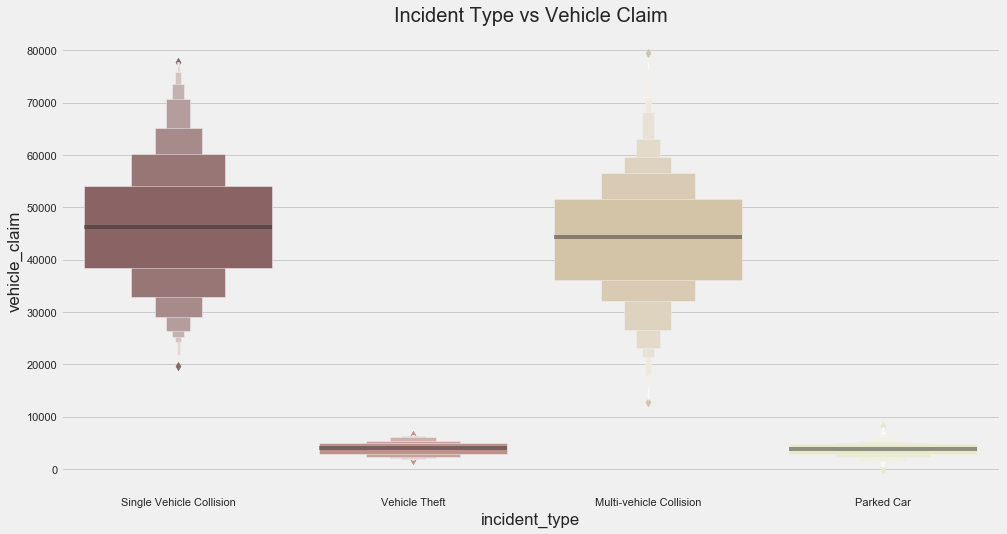

In [26]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)

sns.boxenplot(df['incident_type'], df['vehicle_claim'], palette = 'pink')
plt.title('Incident Type vs Vehicle Claim', fontsize = 20)
plt.show()

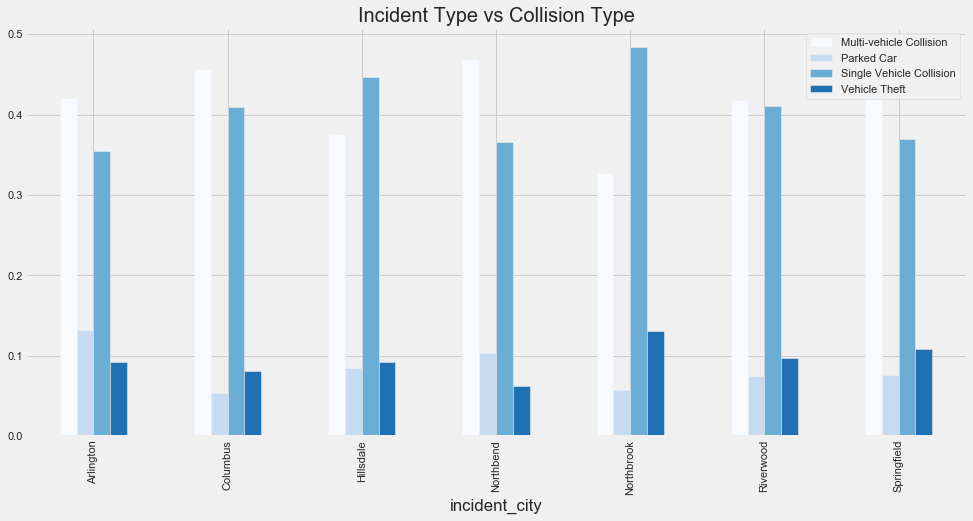

In [27]:
incident = pd.crosstab(df['incident_city'], df['incident_type'])
colors = plt.cm.Blues(np.linspace(0, 1, 5))
incident.div(incident.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                                           stacked = False,
                                                           figsize = (15, 7),
                                                           color = colors)

plt.title('Incident Type vs Collision Type', fontsize = 20)
plt.legend()
plt.show()

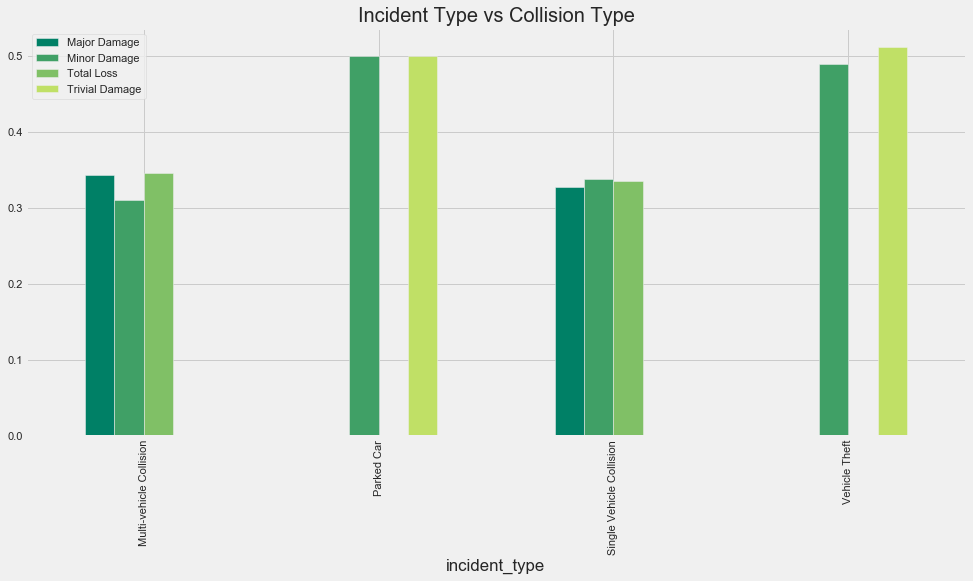

In [28]:
incident = pd.crosstab(df['incident_type'], df['incident_severity'])
colors = plt.cm.summer(np.linspace(0, 1, 5))
incident.div(incident.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                                           stacked = False,
                                                           figsize = (15, 7),
                                                           color = colors)

plt.title('Incident Type vs Collision Type', fontsize = 20)
plt.legend()
plt.show()

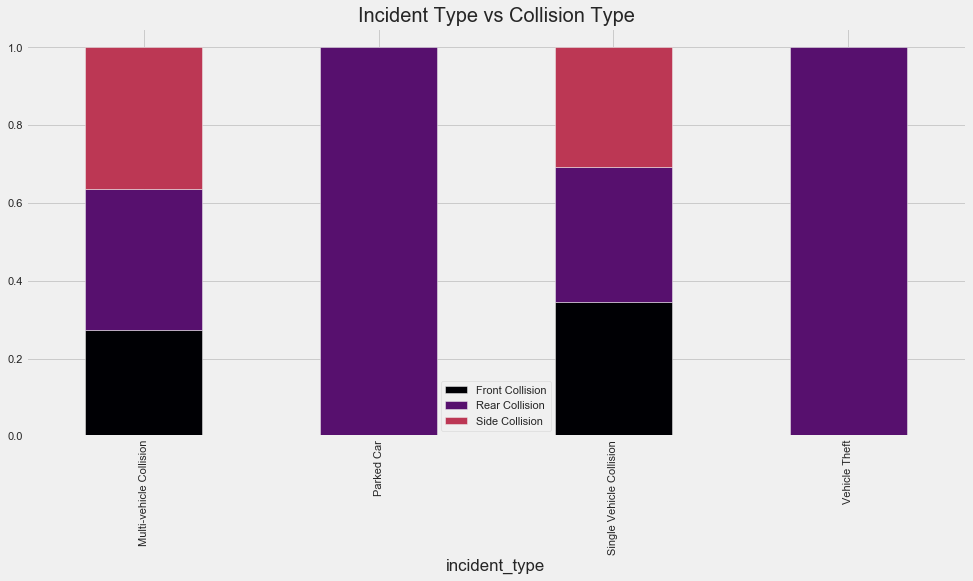

In [29]:
incident = pd.crosstab(df['incident_type'], df['collision_type'])
colors = plt.cm.inferno(np.linspace(0, 1, 5))
incident.div(incident.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                                           stacked = True,
                                                           figsize = (15, 7),
                                                           color = colors)

plt.title('Incident Type vs Collision Type', fontsize = 20)
plt.legend()
plt.show()

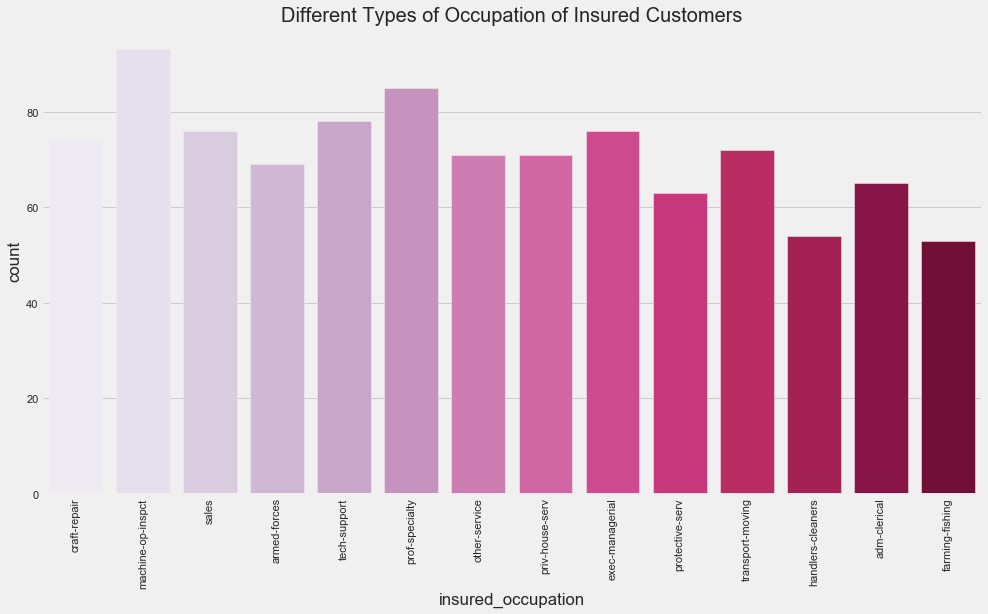

In [30]:
# les hobbies des assurés

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)

sns.countplot(df['insured_occupation'], palette = 'PuRd')
plt.title('Different Types of Occupation of Insured Customers', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

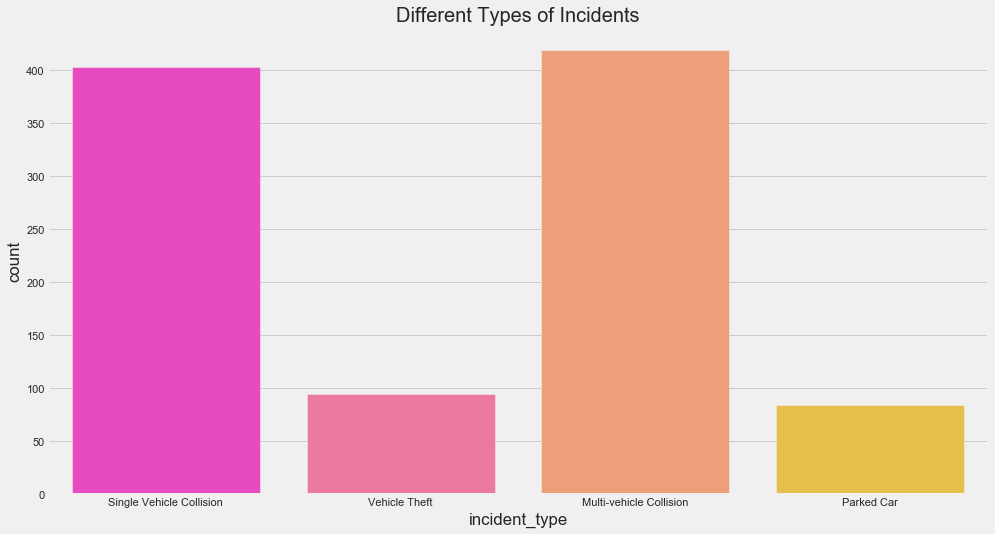

In [31]:
# regardons les types d'incidence

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)

sns.countplot(df['incident_type'], palette = 'spring')
plt.title('Different Types of Incidents', fontsize = 20)
plt.show()

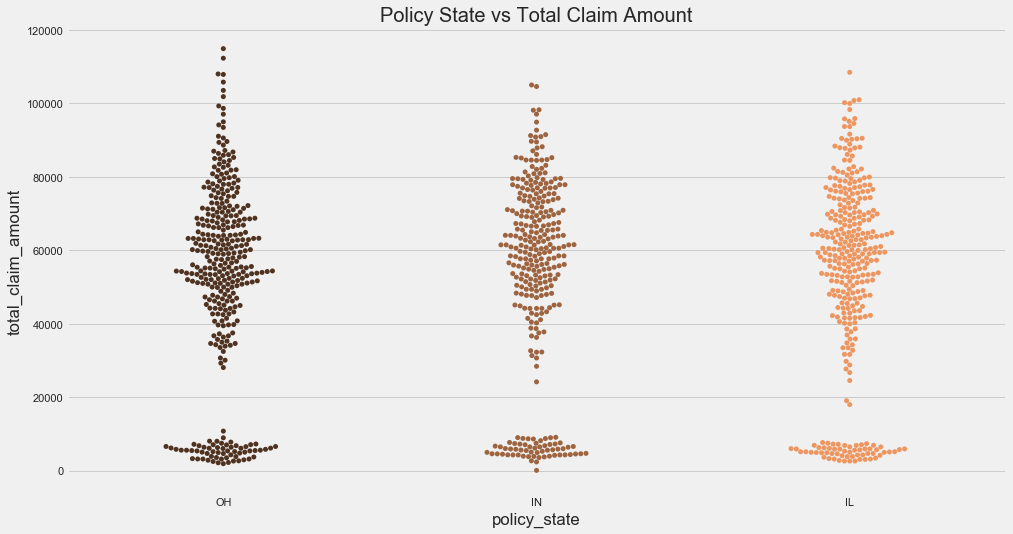

In [32]:
# swarm plot

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)

sns.swarmplot(df['policy_state'], df['total_claim_amount'], palette = 'copper')
plt.title('Policy State vs Total Claim Amount', fontsize = 20)
plt.show()

In [34]:
import warnings
import plotly
import plotly.offline as py
warnings.filterwarnings('ignore')

figure = bubbleplot(dataset = df, x_column = 'policy_annual_premium', y_column = 'total_claim_amount', 
    bubble_column = 'insured_sex', time_column = 'auto_year', size_column = 'months_as_customer', color_column = 'insured_sex', 
    x_title = "Annual Policy Premium", y_title = "Total Claim Amount", title = 'Annual Premium vs Total Claim Amount vs Months as Customer',
    x_logscale = False, scale_bubble = 3, height = 650)

py.iplot(figure, config={'scrollzoom': True})

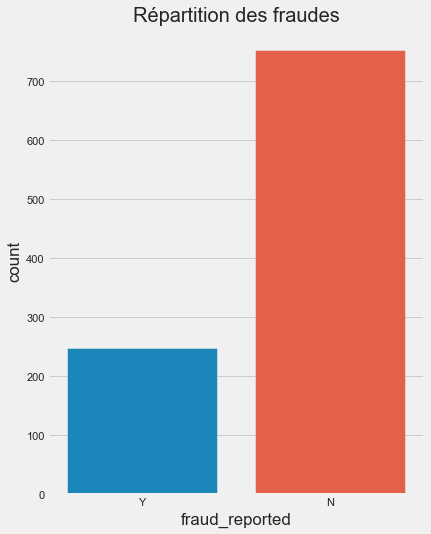

In [37]:
# repartition des fraudes
f, ax = plt.subplots(figsize=(6, 8))
plt.title("Répartition des fraudes",  fontsize=20)
sns.countplot(x='fraud_reported',data=df)

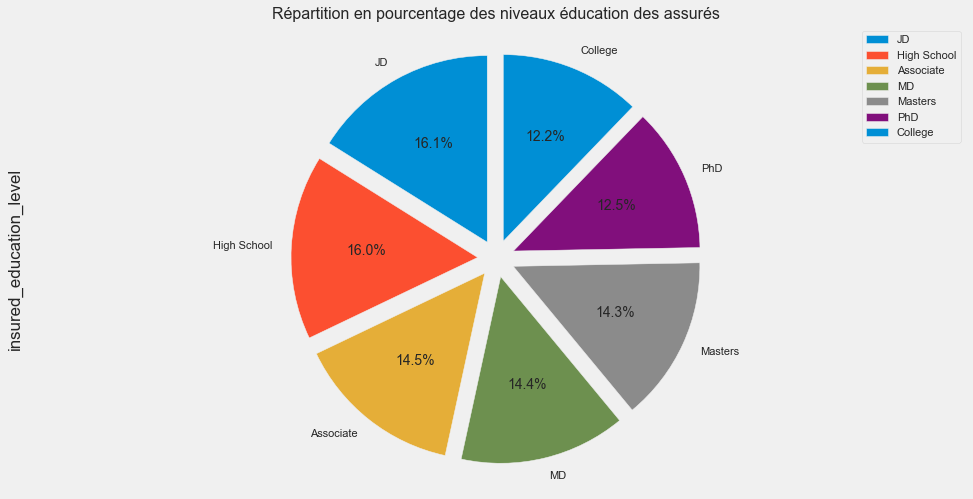

In [38]:
# répartition en pourcetage du niveau d'éducation des assurés
c=df.insured_education_level.value_counts(normalize =True)
plt.axis('equal')
plt.title('Répartition en pourcentage des niveaux éducation des assurés', fontsize=16)
explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1)
c.plot(kind='pie', explode=explode,legend=True, autopct='%1.1f%%',startangle=90,figsize=(15,8))

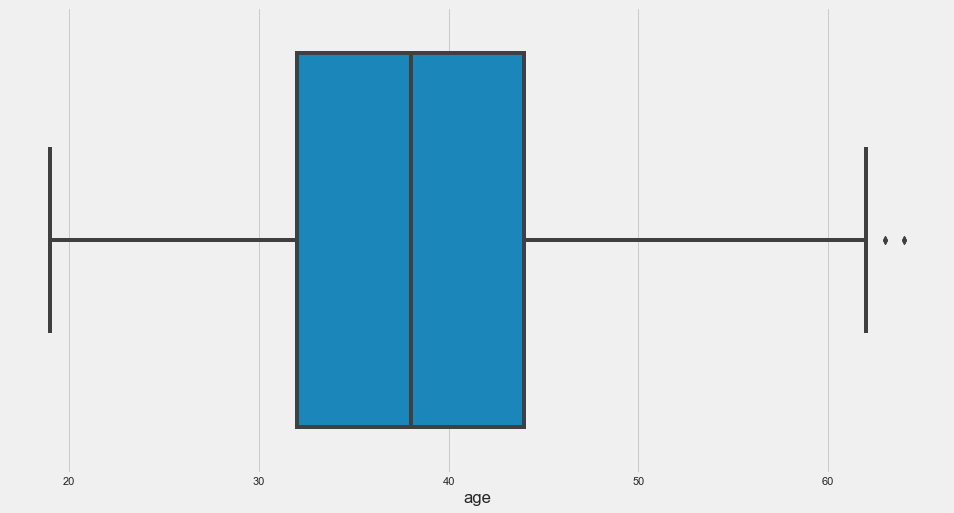

In [39]:
# boxplot horizontal des ages
sns.boxplot(x=df['age'])

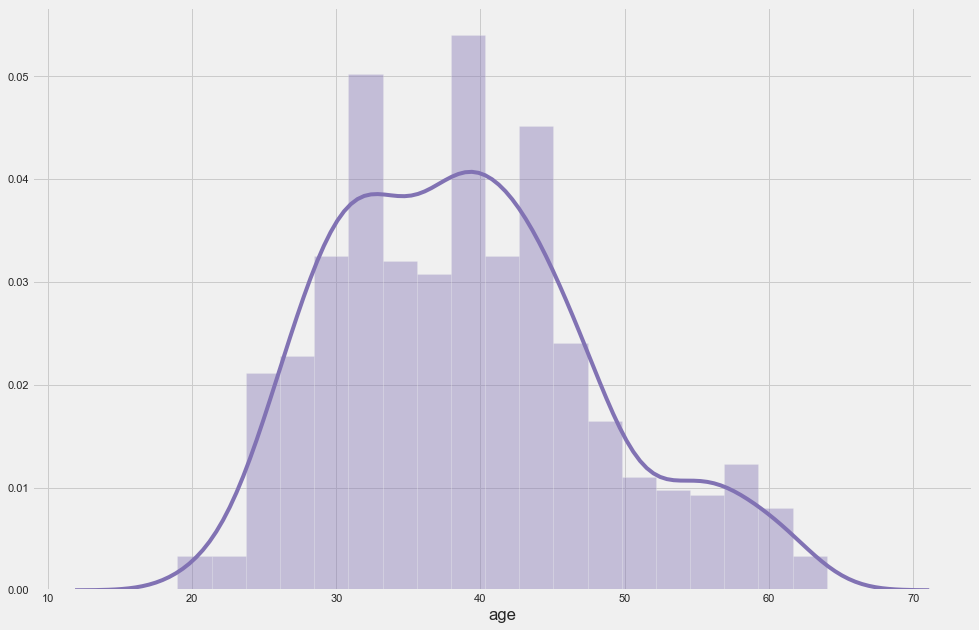

In [40]:
# distribution des ages des assurés
plt.figure(figsize=(15, 10))
ax=sns.distplot(df['age'],color='m')

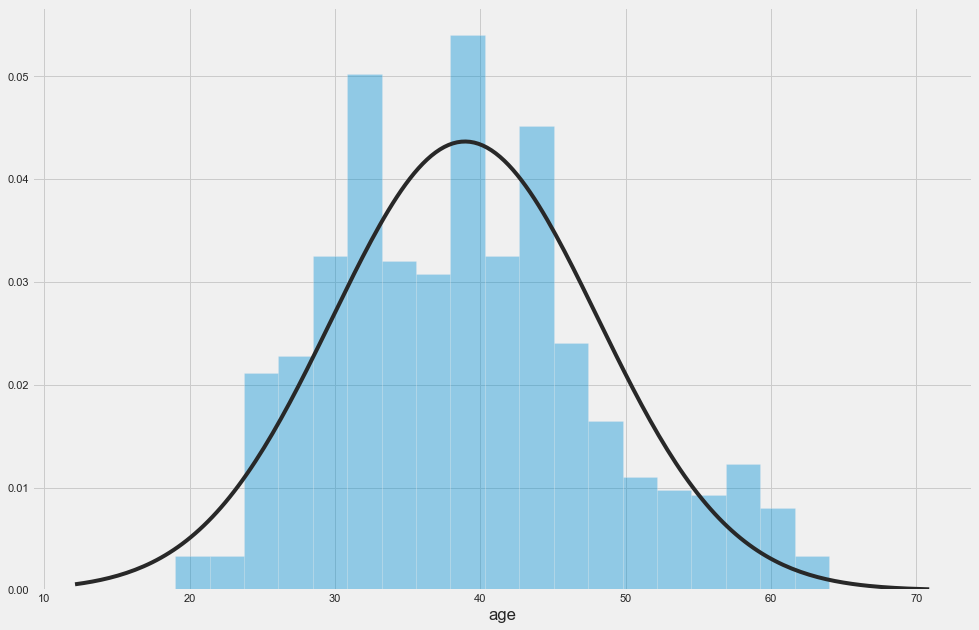

In [41]:
# on normalise cette distributiion
from scipy.stats import norm
plt.figure(figsize=(15, 10))
ax = sns.distplot(df['age'], fit=norm, kde=False)

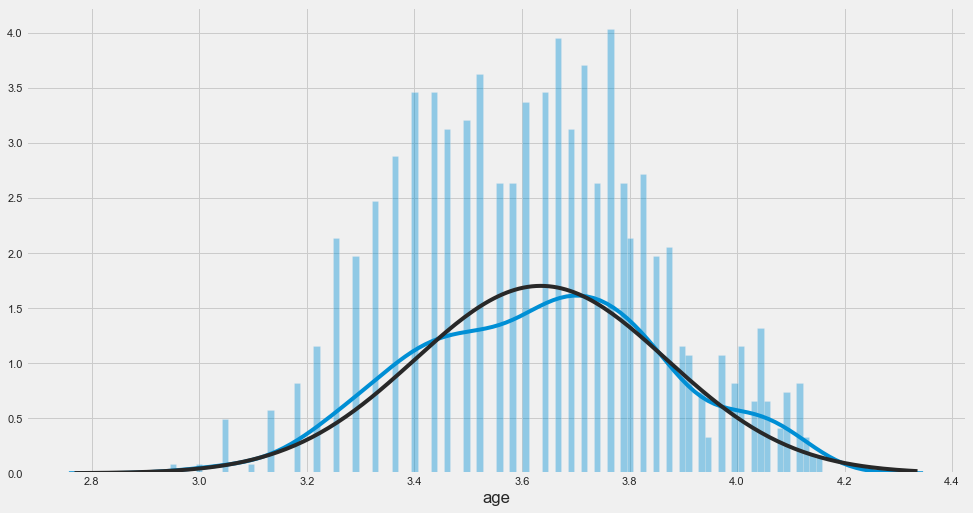

In [42]:
# distibution des ages  en coordonnées logarithmiques
plt.figure(figsize=(15, 8))
sns.distplot(np.log(df.age),fit =norm, bins=100)

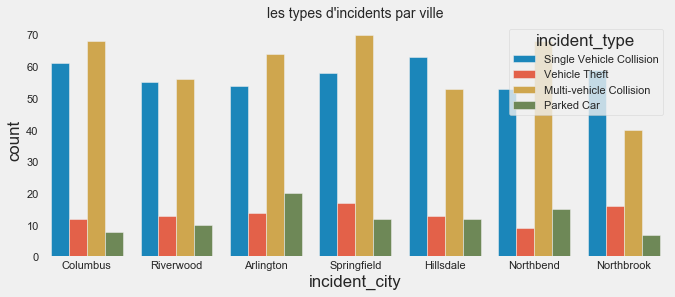

In [43]:
# regardons les types d'incidents par ville
plt.figure(figsize=(10, 4))
plt.grid()
plt.title("les types d'incidents par ville", fontsize=14)
sns.countplot(x='incident_city', hue= 'incident_type', data=df )

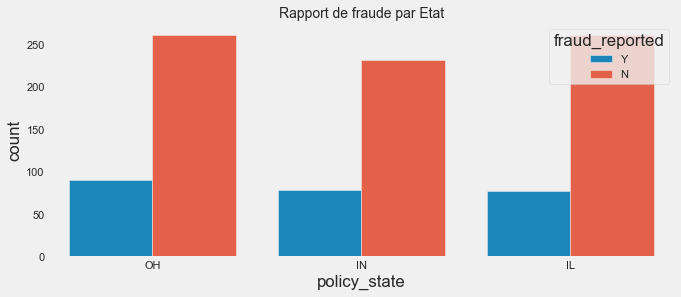

In [44]:
# regardons le rapport de fraude par Etat
plt.figure(figsize=(10, 4))
plt.grid()
plt.title("Rapport de fraude par Etat", fontsize=14)
sns.countplot(x='policy_state', hue= 'fraud_reported', data=df )

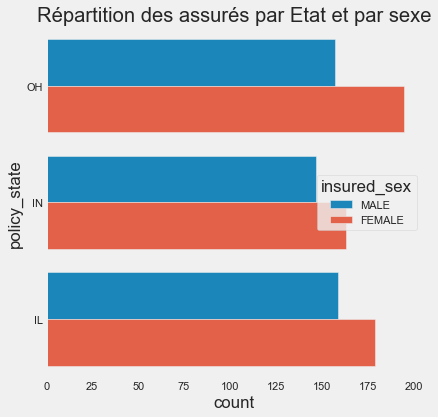

In [45]:
# répartition des assurés par Etat et par sexe
f, ax = plt.subplots(figsize=(6, 6))
plt.grid()
plt.title('Répartition des assurés par Etat et par sexe')
sns.countplot(y='policy_state',hue='insured_sex',data=df)

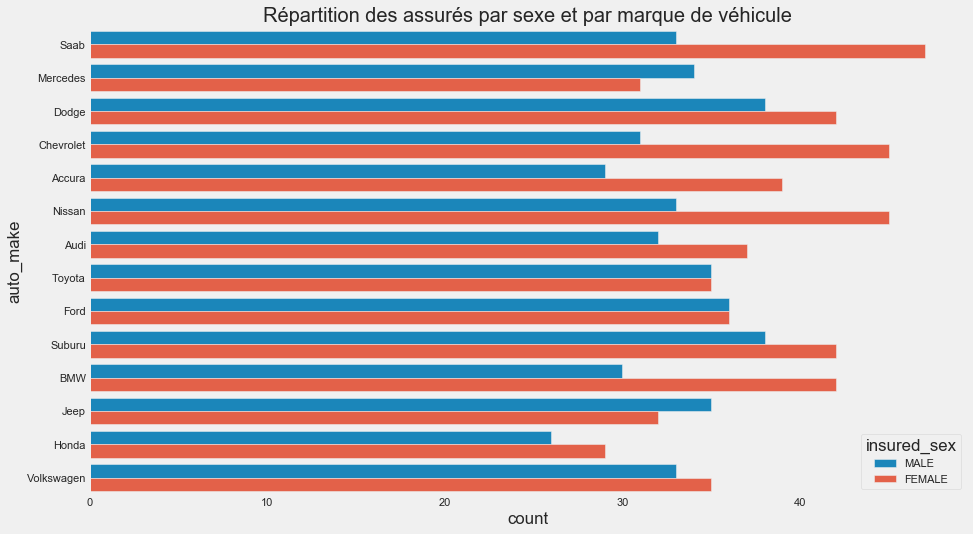

In [46]:
# Répartition des assurés par sexe et par marque de véhicule
f, ax = plt.subplots(figsize=(14, 8))
plt.grid()
plt.title('Répartition des assurés par sexe et par marque de véhicule', fontsize=20)
sns.countplot(y='auto_make',hue='insured_sex', data=df)

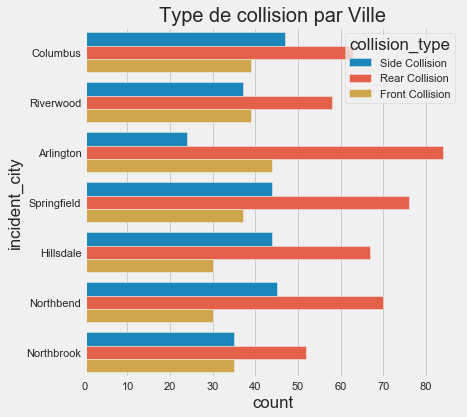

In [47]:
f, ax = plt.subplots(figsize=(6, 6))
plt.title("Type de collision par Ville", fontsize=20)
sns.countplot(y='incident_city',hue='collision_type',data=df)

Text(0.5, 1.0, 'rapport de fraude par rapport aux loisirs des assurés')

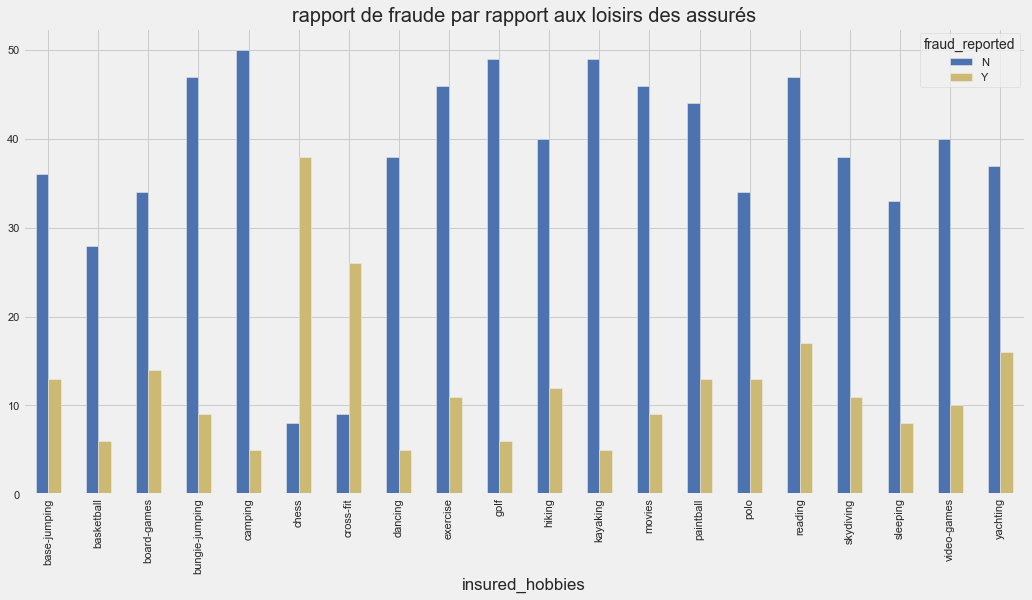

In [48]:
hobbies=pd.crosstab(df['insured_hobbies'], df['fraud_reported'])
hobbies.plot(kind='bar', figsize=(16,8), color=['b', 'y'])
plt.title("rapport de fraude par rapport aux loisirs des assurés", fontsize=20)

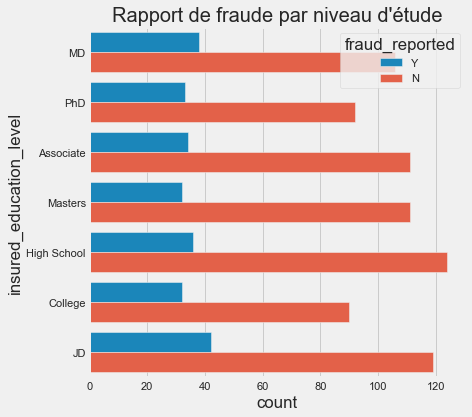

In [49]:
f, ax = plt.subplots(figsize=(6, 6))
plt.title("Rapport de fraude par niveau d'étude", fontsize=20)
sns.countplot(y='insured_education_level',hue='fraud_reported',data=df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001385FB48>,
      dtype=object)

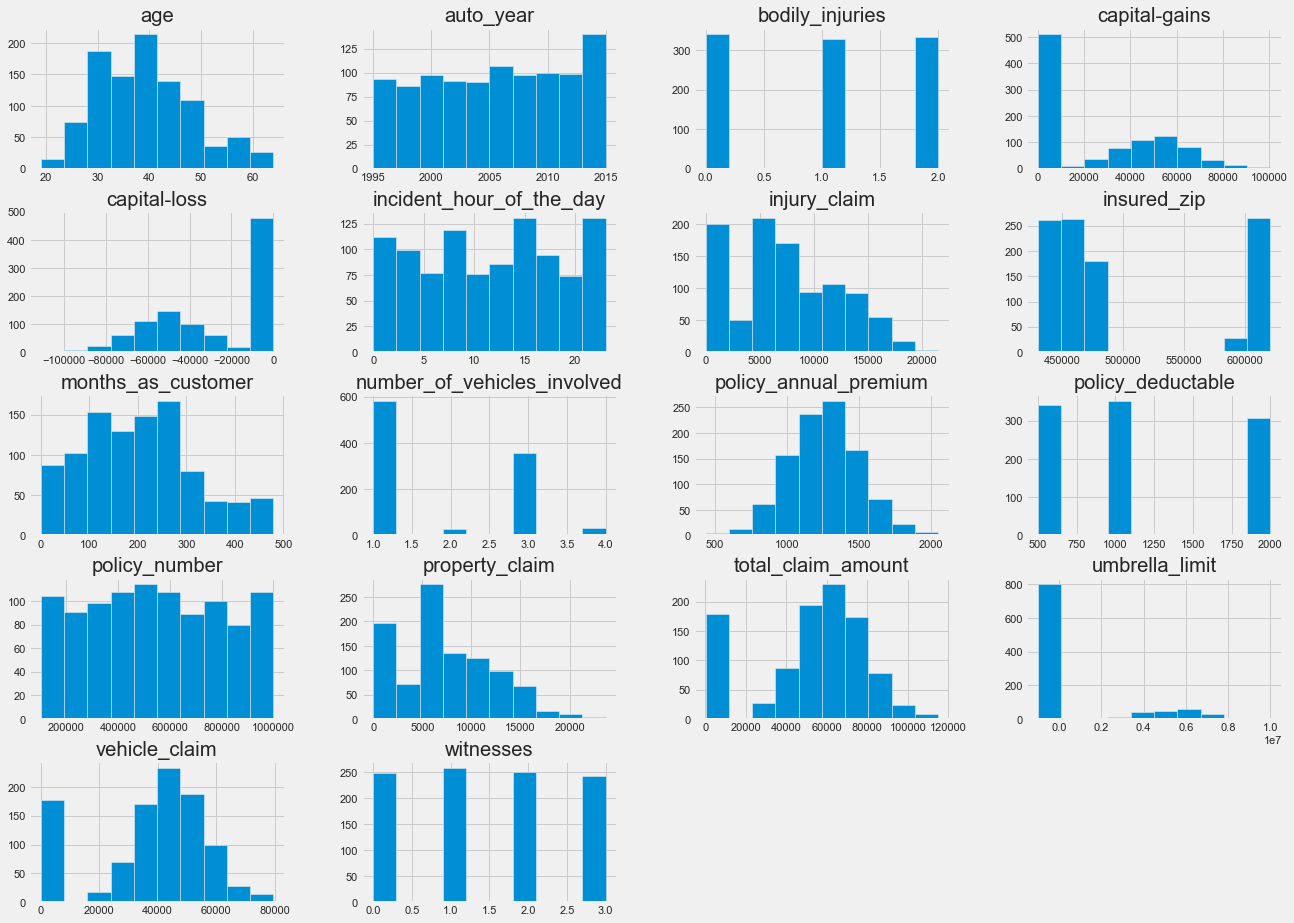

In [50]:
# distribution de l'ensemble des variables numérique
df.hist(figsize=(20, 15))

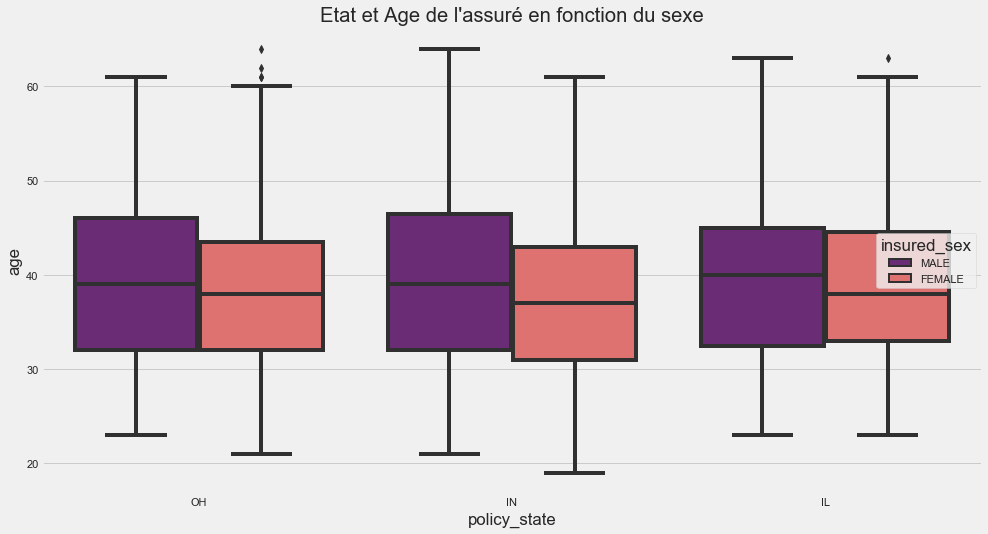

In [51]:
# Etat et Age de l'assuré en fonction du sexe
plt.title("Etat et Age de l'assuré en fonction du sexe")
ax=sns.boxplot(x='policy_state', y='age', hue='insured_sex', data=df, palette='magma')

# Data Processing

In [53]:
# Extrayons les jours, le mois et l'année à partir de la date de liaison de la police

df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'], errors = 'coerce')

In [54]:
# Nous encodons le rapport de fraude en numérique

df['fraud_reported'] = df['fraud_reported'].replace(('Y','N'),(0,1))

# checking the values of fraud reported
df['fraud_reported'].value_counts()

1    753
0    247
Name: fraud_reported, dtype: int64

In [55]:
df[['auto_model','fraud_reported']].groupby(['auto_model'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

auto_model  fraud_reported
0         3 Series        0.944444
31             RSX        0.916667
25          Malibu        0.900000
36        Wrangler        0.880952
29      Pathfinder        0.870968
35          Ultima        0.869565
9            Camry        0.857143
11         Corolla        0.850000
8              CRV        0.850000
21          Legacy        0.843750
27            Neon        0.837838
3               95        0.814815
33              TL        0.800000
2               93        0.800000
23             MDX        0.777778
6           Accord        0.769231
17  Grand Cherokee        0.760000
13          Escape        0.750000
12            E400        0.740741
4               A3        0.729730
18      Highlander        0.727273
28          Passat        0.727273
1              92x        0.714286
20           Jetta        0.714286
16          Fusion        0.714286
15       Forrestor        0.714286
26          Maxima        0.708333
19         Impreza        0.700000
37              X5        0.695652
30             RAM        0.674419
22              M5        0.666667
5               A5        0.656250
10           Civic        0.636364
14            F150        0.629630
34           Tahoe        0.625000
7             C300        0.611111
24           ML350        0.600000
32       Silverado        0.590909
38              X6        0.562500

In [56]:

df['auto_make'] = df['auto_make'].replace(('3 Series','RSX','Malibu','Wrangler','Pathfinder','Ultima','Camry',
                'Corolla','CRV','Legacy','Neon','95','TL','93','MDX','Accord','Grand Cherokee','Escape','E4000',
            'A3','Highlander','Passat','92x','Jetta','Fusion','Forrestor','Maxima','Impreza','X5','RAM','M5','A5',
                'Civic','F150','Tahaoe','C300','ML350','Silverado','X6'),
                (0.95,0.91, 0.90,0.88,0.87,0.86,0.855,0.85,0.85,0.84,0.83,0.81,0.80,0.80,0.78,0.77,0.76,0.75,0.74,
                 0.73,0.72,0.72,0.71,0.71,0.71,0.71,0.70,0.70,0.69,0.67,0.66,0.65,0.64,0.63,0.62,0.61,0.60,0.59,0.56))

# let's check the values
df['auto_make'].value_counts()

Saab          80
Suburu        80
Dodge         80
Nissan        78
Chevrolet     76
BMW           72
Ford          72
Toyota        70
Audi          69
Volkswagen    68
Accura        68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64

In [57]:
# let's check the correlation auto make with the target

df[['auto_make','fraud_reported']].groupby(['auto_make'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

auto_make  fraud_reported
7         Jeep        0.835821
9       Nissan        0.820513
12      Toyota        0.814286
0       Accura        0.808824
10        Saab        0.775000
11      Suburu        0.762500
4        Dodge        0.750000
6        Honda        0.745455
3    Chevrolet        0.723684
2          BMW        0.722222
13  Volkswagen        0.720588
1         Audi        0.695652
5         Ford        0.694444
8     Mercedes        0.661538

In [66]:
# let's check the correlation of authorities_contacted with the target

df[['police_report_available','fraud_reported']].groupby(['police_report_available'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

police_report_available  fraud_reported
1                     YES        0.770701
0                      NO        0.744898

In [67]:
# let's perform target encoding for property damage

df['police_report_available'] = df['police_report_available'].replace(('NO','YES'),(0.77,0.74))

# let's check the values
# data['police_report_available'].value_counts()

In [68]:
# let's check the correlation of authorities_contacted with the target

df[['property_damage','fraud_reported']].groupby(['property_damage'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

property_damage  fraud_reported
0              NO        0.757880
1             YES        0.741722

In [69]:
# let's perform target encoding for property damage

df['property_damage'] = df['property_damage'].replace(('NO','YES'),(0.76,0.74))

# let's check the values
# data['property_damage'].value_counts()

In [70]:
# let's check the correlation of authorities_contacted with the target

df[['incident_city','fraud_reported']].groupby(['incident_city'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

incident_city  fraud_reported
4    Northbrook        0.778689
5     Riverwood        0.776119
3     Northbend        0.765517
6   Springfield        0.757962
2     Hillsdale        0.751773
1      Columbus        0.738255
0     Arlington        0.710526

In [71]:
# let's do target encoding for incident city

df['incident_city'] = df['incident_city'].replace(('Northbrook','Riverwood','Northbend','Springfield',
                                    'Hillsdale','Columbus','Arlington'),(0.78,0.77,0.76,0.75,0.74,0.73,0.71))

# let's check the values
# df['incident_city'].value_counts()

In [72]:
# let's check the correlation of authorities_contacted with the target

df[['incident_state','fraud_reported']].groupby(['incident_state'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

incident_state  fraud_reported
6             WV        0.820276
1             NY        0.778626
5             VA        0.772727
3             PA        0.733333
4             SC        0.705645
0             NC        0.690909
2             OH        0.565217

In [73]:
# let's perform target encoding for incident state

df['incident_state'] = df['incident_state'].replace(('WV','NY','VA','PA','SC','NC','OH'),
                                                        (0.82,0.77,0.76,0.73,0.70,0.69,0.56))

# checking the values
# data['incident_state'].value_counts()

In [74]:
# let's check the correlation of authorities_contacted with the target

df[['authorities_contacted','fraud_reported']].groupby(['authorities_contacted'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

authorities_contacted  fraud_reported
2                  None        0.934066
4                Police        0.791096
1                  Fire        0.730942
0             Ambulance        0.709184
3                 Other        0.681818

In [75]:
# let's perform target encoding for authorities contacted

df['authorities_contacted'] = df['authorities_contacted'].replace(('None','Police','Fire','Ambulance','Other'),
                                                                      (0.94,0.79,0.73,0.70,0.68))

# let's check the values
#data['authorities'].value_counts()

In [76]:
# let's check the correlation of incident_severity with the target

df[['incident_severity','fraud_reported']].groupby(['incident_severity'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

incident_severity  fraud_reported
3    Trivial Damage        0.933333
1      Minor Damage        0.892655
2        Total Loss        0.871429
0      Major Damage        0.394928

In [77]:
# let's perform target encoding for incident severity

df['incident_severity'] = df['incident_severity'].replace(('Trivial Damage','Minor Damage','Total Loss',
                                                              'Major Damage'),(0.94,0.89,0.87,0.39))

# let's check the values
# df['incident_severity'].value_counts()

In [78]:
# let's check the correlation of collision_type with the target

df[['collision_type','fraud_reported']].groupby(['collision_type'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

collision_type  fraud_reported
1   Rear Collision        0.772340
2   Side Collision        0.746377
0  Front Collision        0.724409

In [79]:
# let's perform target encoding for collision type

df['collision_type'] = df['collision_type'].replace(('Rear Collision', 'Side Collision', 'Front Collision'),
                                                        (0.78,0.74,0.72))

# let's check the values of collision type
# df['collision_type'].value_counts()

In [80]:
# let's check the correlation of incident_type with the target

df[['incident_type','fraud_reported']].groupby(['incident_type'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

incident_type  fraud_reported
3             Vehicle Theft        0.914894
1                Parked Car        0.904762
0   Multi-vehicle Collision        0.727924
2  Single Vehicle Collision        0.709677

In [81]:
# let's perform target encoing for incident type

df['incident_type'] = df['incident_type'].replace(('Vehicle Theft','Parked Car','Multi-vehicle Collision',
                                'Single Vehicle Collision'),(0.91, 0.90, 0.72,0.70))

# let's check the values
#df['incident_type'].value_counts()

In [84]:
df['incident_date'] = pd.to_datetime(df['incident_date'], errors = 'coerce')

# extracting days and month from date
df['incident_month'] = df['incident_date'].dt.month
df['incident_day'] = df['incident_date'].dt.day

In [85]:
# let's know the relation between insured_relationship and fraud reported

df[['insured_relationship','fraud_reported']].groupby(['insured_relationship'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

insured_relationship  fraud_reported
0              husband        0.794118
3            own-child        0.786885
4            unmarried        0.758865
1        not-in-family        0.741379
5                 wife        0.729032
2       other-relative        0.706215

In [86]:
# let's do target encoding for insured relationship

df['insured_relationship'] = df['insured_relationship'].replace(('husband','own-child','unmarried',
                                        'not-in-family','wife','other-relative'),(0.79,0.78,0.75,0.74,0.72,0.70))

#df['insured-relationship'].value_counts()

In [87]:
# let's know the relation between insured_hobbies and fraud reported

df[['insured_hobbies','fraud_reported']].groupby(['insured_hobbies'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

insured_hobbies  fraud_reported
4          camping        0.909091
11        kayaking        0.907407
9             golf        0.890909
7          dancing        0.883721
3   bungie-jumping        0.839286
12          movies        0.836364
1       basketball        0.823529
8         exercise        0.807018
17        sleeping        0.804878
18     video-games        0.800000
16       skydiving        0.775510
13       paintball        0.771930
10          hiking        0.769231
0     base-jumping        0.734694
15         reading        0.734375
14            polo        0.723404
2      board-games        0.708333
19        yachting        0.698113
6        cross-fit        0.257143
5            chess        0.173913

In [88]:
# let's perform target encoding for insured_hobbies

df['insured_hobbies'] = df['insured_hobbies'].replace(('camping', 'kayaking', 'golf','dancing',
        'bungie-jumping','movies', 'basketball','exercise','sleeping','video-games','skydiving','paintball',
            'hiking','base-jumping','reading','polo','board-games','yachting', 'cross-fit','chess'),(0.91, 0.90,
                0.89, 0.88,0.84,0.83,0.82,0.81,0.805,0.80,0.78,0.77,0.76,0.73,0.73,0.72,0.70,0.69,0.25,0.17))

#df['insured_hobbies'].value_counts()

In [89]:
# let's know the relation between insured_occupation and fraud reported

df[['insured_occupation','fraud_reported']].groupby(['insured_occupation'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

insured_occupation  fraud_reported
7       other-service        0.830986
8     priv-house-serv        0.830986
0        adm-clerical        0.830769
5   handlers-cleaners        0.796296
9      prof-specialty        0.788235
10    protective-serv        0.777778
6   machine-op-inspct        0.763441
1        armed-forces        0.753623
11              sales        0.723684
12       tech-support        0.717949
13   transport-moving        0.708333
2        craft-repair        0.702703
4     farming-fishing        0.698113
3     exec-managerial        0.631579

In [90]:
# let's perform target encoding for insured_occupation

df['insured_occupation'] = df['insured_occupation'].replace(('other-service','priv-house-serv',
                        'adm-clerical','handlers-cleaners','prof-specialty','protective-serv',
                'machine-op-inspct','armed-forces','sales','tech-support','transport-moving','craft-repair',
                    'farming-fishing','exec-managerial'),(0.84, 0.84,0.83, 0.79,0.78,0.77,0.76,0.75,0.72,0.71,
                                                          0.705,0.70,0.69,0.63))
# df['insured_occupation'].value_counts()

In [91]:
# let's know the relation of insured_education_level with faud_reported

df[['insured_education_level','fraud_reported']].groupby(['insured_education_level'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

insured_education_level  fraud_reported
5                 Masters        0.776224
2             High School        0.775000
0               Associate        0.765517
3                      JD        0.739130
1                 College        0.737705
4                      MD        0.736111
6                     PhD        0.736000

In [92]:
 #let's perform target encoding

df['insured_education_level'] = df['insured_education_level'].replace(('Masters', 'High School','Associate',
                                        'JD','College', 'MD','PhD'),(0.78,0.77,0.76,0.74,0.73,0.72,0.71))
#df['insured_education_level'].value_counts()

In [93]:
# lets know the relation of insured sex and fraud reported

df[['insured_sex','fraud_reported']].groupby(['insured_sex'], as_index = False).mean().sort_values(
    by = 'fraud_reported', ascending = False)

insured_sex  fraud_reported
0      FEMALE        0.765363
1        MALE        0.738661

In [94]:
# target encoding for sex

df['insured_sex'] = df['insured_sex'].replace(('FEMALE','MALE'),(0.76,0.73))
#df['insured_sex'].value_counts()

In [95]:
# csl - combined single limit

'''CSL is a single number that describes the predetermined limit for the combined total of the Bodily Injury 
Liability coverage and Property Damage Liability coverage per occurrence or accident.'''

'CSL is a single number that describes the predetermined limit for the combined total of the Bodily Injury \nLiability coverage and Property Damage Liability coverage per occurrence or accident.'

In [96]:
# lets know the relation of policy state and fraud reported

df[['policy_csl','fraud_reported']].groupby(['policy_csl'], as_index = False).mean().sort_values(
    by = 'fraud_reported', ascending = False)

policy_csl  fraud_reported
2   500/1000        0.783333
0    100/300        0.742120
1    250/500        0.737892

In [98]:
# target encoding for policy_csl

df['policy_csl'] = df['policy_csl'].replace(('500/1000','100/300','250/500'),(0.78,0.74,0.73))

# check the values
# df['policy_csl'].value_counts()

In [99]:
# lets know the relation of policy state and fraud reported

df[['policy_state','fraud_reported']].groupby(['policy_state'], as_index = False).mean().sort_values(
    by = 'fraud_reported', ascending = False)

policy_state  fraud_reported
0           IL        0.772189
1           IN        0.745161
2           OH        0.741477

In [100]:

df['policy_state'] = df['policy_state'].replace(('IL','IN','OH'),(0.77,0.745,0.74))

# check the values
# df['policy_state'].value_counts()

In [101]:
# let's delete unnecassary columns

df= df.drop(['policy_number','policy_bind_date', 'incident_date','incident_location','auto_model'], axis = 1)

# let's check the columns after deleting the columns
df.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_year', 'fraud_reported', 'incident_month', 'incident_day'],
      dtype='object')

In [102]:
# let's split the data into dependent and independent sets

x = df.drop(['fraud_reported'], axis = 1)
y = df['fraud_reported']

print("Shape of x :", x.shape)
print("Shape of y :", y.shape)

Shape of x : (1000, 35)
Shape of y : (1000,)


In [103]:
# let's split the dataset into train and test sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (800, 35)
Shape of x_test : (200, 35)
Shape of y_train : (800,)
Shape of y_test : (200,)


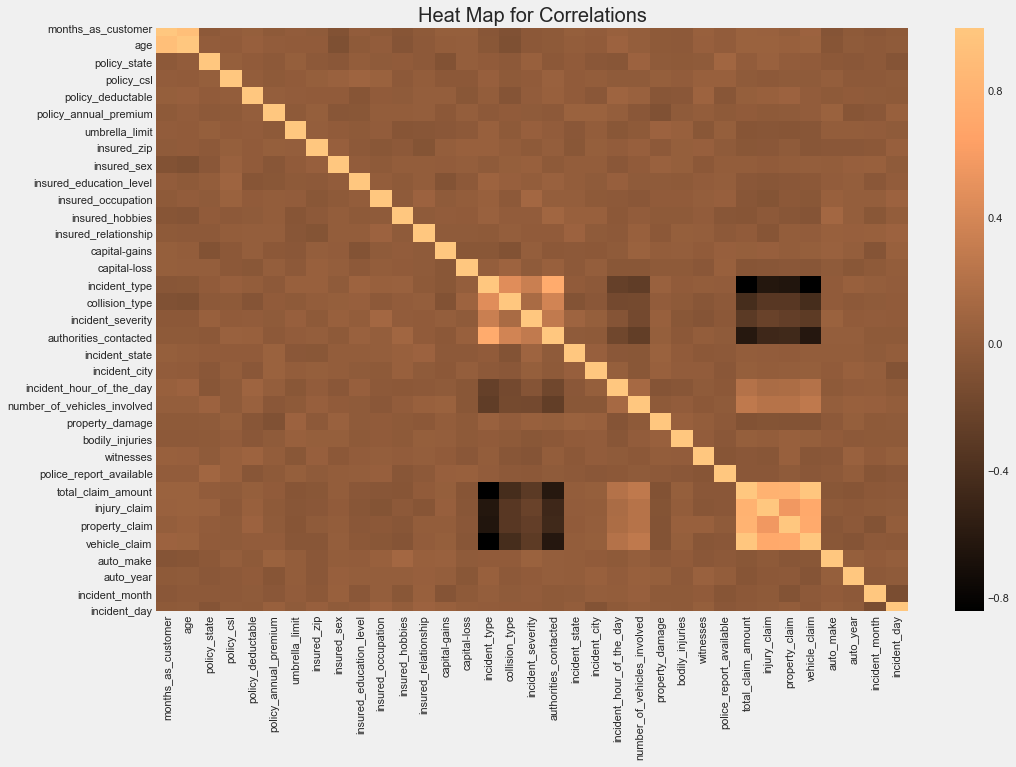

In [104]:
plt.rcParams['figure.figsize'] = (15, 10)
sns.heatmap(x_train.corr(), cmap = 'copper')
plt.title('Heat Map for Correlations', fontsize = 20)
plt.show()

# Modélisation 

Random Forest Classifier

In [108]:
#pip install imblearn

              precision    recall  f1-score   support

           0       0.83      0.42      0.56        57
           1       0.81      0.97      0.88       143

    accuracy                           0.81       200
   macro avg       0.82      0.69      0.72       200
weighted avg       0.81      0.81      0.79       200



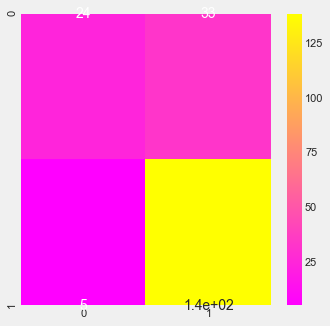

array([[ 24,  33],
       [  5, 138]], dtype=int64)

In [110]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
                 
model = RandomForestClassifier(n_estimators = 100,random_state = 0, max_depth=12)
# Entrainement
model.fit(x_train, y_train)
#prédiction
y_pred = model.predict(x_test)

# Rapport de classification
cr = classification_report(y_test,  y_pred)
print(cr)
# making a confusion matrix
plt.rcParams['figure.figsize'] = (5, 5)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'spring')
plt.show()
cm

Easy Ensemble Classifier

XGBoost

              precision    recall  f1-score   support

           0       0.85      0.70      0.77        57
           1       0.89      0.95      0.92       143

    accuracy                           0.88       200
   macro avg       0.87      0.83      0.84       200
weighted avg       0.88      0.88      0.88       200



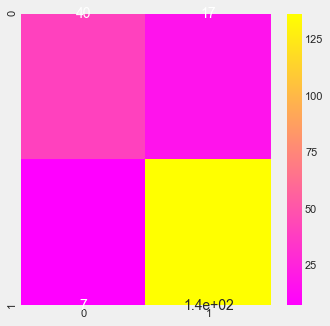

array([[ 40,  17],
       [  7, 136]], dtype=int64)

In [111]:
import xgboost as xgb
clf_xgb=xgb.XGBClassifier(max_depth=1)
#Entrainement du modèle
clf_xgb.fit(x,y)
#prédiction
y_pred=clf_xgb.predict(x_test)

# Rapport de classification
cr = classification_report(y_test,  y_pred)
print(cr)
# Matrice de confusion
plt.rcParams['figure.figsize'] = (5, 5)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'spring')
plt.show()
cm

 Arbre de Décision

              precision    recall  f1-score   support

           0       0.67      0.56      0.61        57
           1       0.84      0.89      0.86       143

    accuracy                           0.80       200
   macro avg       0.75      0.72      0.74       200
weighted avg       0.79      0.80      0.79       200



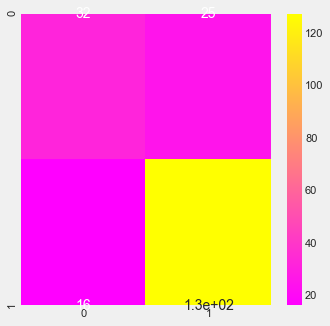

array([[ 32,  25],
       [ 16, 127]], dtype=int64)

In [112]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
# entrainement
digit_tree=tree.fit(x_train, y_train)
#prédiction 
y_pred=tree.predict(x_test)
# Estimation de l’erreur de prévision
digit_tree.score(x_test,y_test)
cr = classification_report(y_test,  y_pred)
print(cr)
# making a confusion matrix
plt.rcParams['figure.figsize'] = (5, 5)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'spring')
plt.show()
cm

In [113]:
#recherche des hyperparamètres du modèle
from sklearn.model_selection import GridSearchCV
param=[{"max_depth":list(range(2,10))}]
titan_tree= GridSearchCV(DecisionTreeClassifier(),
param,cv=5,n_jobs=-1)
titan_opt=titan_tree.fit(x_train, y_train)
# paramètre optimal
titan_opt.best_params_


{'max_depth': 2}

              precision    recall  f1-score   support

           0       0.73      0.63      0.68        57
           1       0.86      0.91      0.88       143

    accuracy                           0.83       200
   macro avg       0.80      0.77      0.78       200
weighted avg       0.82      0.83      0.83       200



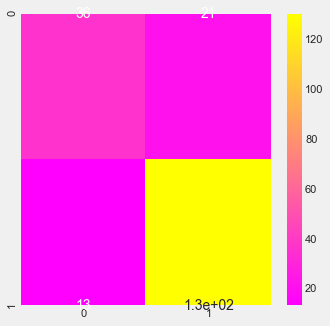

array([[ 36,  21],
       [ 13, 130]], dtype=int64)

In [114]:
# amélioration du modèle en utilisant la valeur de l'hyperparamètre 'max_depth'=2
tree=DecisionTreeClassifier(max_depth=2)
digit_tree=tree.fit(x_train, y_train)
y_pred=tree.predict(x_test)
# Estimation de l’erreur de prévision
digit_tree.score(x_test,y_test)
cr = classification_report(y_test,  y_pred)
print(cr)
# making a confusion matrix
plt.rcParams['figure.figsize'] = (5, 5)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'spring')
plt.show()
cm

Regression Logistique

In [115]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
titan_logit=logit.fit(x_train, y_train)
y_pred=logit.predict(x_test)

titan_logit.score(x_test,y_test)
cr = classification_report(y_test,  y_pred)
print(cr)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        57
           1       0.71      0.99      0.83       143

    accuracy                           0.71       200
   macro avg       0.36      0.50      0.42       200
weighted avg       0.51      0.71      0.59       200



In [116]:
param=[{"C":[0.01,0.05,0.1,0.15,1,10]}]
logit = GridSearchCV(LogisticRegression(penalty="l1"),
param,cv=5,n_jobs=-1)
titan_logit=logit.fit(x_train, y_train)
titan_logit.best_params_["C"]

10

              precision    recall  f1-score   support

           0       0.83      0.60      0.69        57
           1       0.86      0.95      0.90       143

    accuracy                           0.85       200
   macro avg       0.84      0.77      0.80       200
weighted avg       0.85      0.85      0.84       200



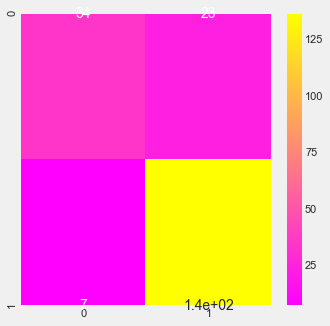

array([[ 34,  23],
       [  7, 136]], dtype=int64)

In [117]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(C=10,penalty="l1")
titan_logit=logit.fit(x_train, y_train)
y_pred14=logit.predict(x_test)
# Erreur
#titan_logit.score(x_test, y_test)
# Coefficients
#titan_logit.coef_
titan_logit.score(x_test,y_test)
cr = classification_report(y_test,  y_pred14)
print(cr)
# making a confusion matrix
plt.rcParams['figure.figsize'] = (5, 5)
cm = confusion_matrix(y_test, y_pred14)
sns.heatmap(cm, annot = True, cmap = 'spring')
plt.show()
cm

              precision    recall  f1-score   support

           0       0.38      0.09      0.14        57
           1       0.72      0.94      0.82       143

    accuracy                           0.70       200
   macro avg       0.55      0.52      0.48       200
weighted avg       0.63      0.70      0.63       200



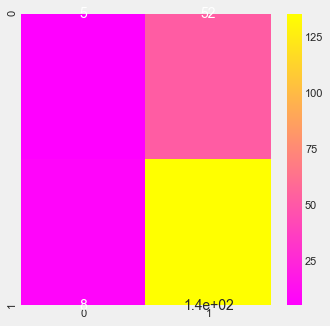

array([[  5,  52],
       [  8, 135]], dtype=int64)

In [119]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
# entrainement
k=knn.fit(x_train, y_train)
#prédiction 
y_pred1=knn.predict(x_test)
# Estimation de l’erreur de prévision
k.score(x_test,y_test)
cr = classification_report(y_test,  y_pred1)
print(cr)
# making a confusion matrix
plt.rcParams['figure.figsize'] = (5, 5)
cm = confusion_matrix(y_test, y_pred1)
sns.heatmap(cm, annot = True, cmap = 'spring')
plt.show()
cm

In [120]:
# recherche des hyperparamètres du modèle
from sklearn.model_selection import GridSearchCV
# grille de valeurs
param=[{"n_neighbors":list(range(1,15))}]
neigh= GridSearchCV(KNeighborsClassifier(),param,cv=5,n_jobs=-1)
bon=neigh.fit(x_train, y_train)
# paramètre optimal
bon.best_params_["n_neighbors"]

13

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        57
           1       0.71      0.99      0.83       143

    accuracy                           0.70       200
   macro avg       0.36      0.49      0.41       200
weighted avg       0.51      0.70      0.59       200



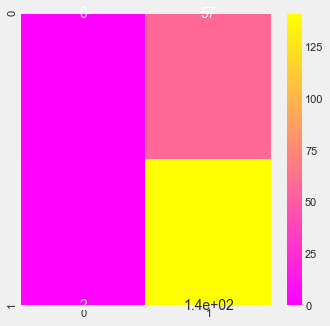

array([[  0,  57],
       [  2, 141]], dtype=int64)

In [121]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=13)
# entrainement
k=knn.fit(x_train, y_train)
#prédiction 
y_pred1=knn.predict(x_test)
# Estimation de l’erreur de prévision
k.score(x_test,y_test)
cr = classification_report(y_test,  y_pred1)
print(cr)
# making a confusion matrix
plt.rcParams['figure.figsize'] = (5, 5)
cm = confusion_matrix(y_test, y_pred1)
sns.heatmap(cm, annot = True, cmap = 'spring')
plt.show()
cm